

<img src="https://i0.wp.com/www.thestartupfounder.com/wp-content/uploads/2023/05/Voice-chat-bro-3.png?w=2000&ssl=1" width="400" height="300">

# Music genre classification

## Overview

This IPython Notebook aims to explore the exciting realm of *music genre classification* using machine learning techniques.

The project involves :
- Analyzing audio features. 
- Training machine learning models to classify music tracks into distinct genres. 
- Tuning the machine learning models 
- Assessing model performance and accuracy.

This notebook will guide through the steps of the models development, and evaluation.

In [1]:
# Packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pickle
import csv
import librosa 

# Tools for analysis
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier 

# Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

#Youtube 
from pytube import YouTube
import os

import warnings
warnings.filterwarnings("ignore")

# Data loading

In [2]:
audio_features = pd.read_csv("dataset/data_3sc.csv")
audio_features

,filename,tempo,mean_y_harmonic,var_y_harmonic,mean_y_perceptr,var_y_perceptr,mean_rms,var_rms,mean_zcr,var_zcr,...,mfcc_var12,mfcc_var13,mfcc_var14,mfcc_var15,mfcc_var16,mfcc_var17,mfcc_var18,mfcc_var19,mfcc_var20,label
0,blues.00000.0.wav,135.999178,-4.719848e-05,0.008388,-0.000060,0.005511,0.130189,0.003559,0.081851,0.000558,...,45.256905,34.240208,47.449917,42.873867,39.547073,36.606857,37.766132,33.668550,43.818882,blues
1,blues.00000.1.wav,123.046875,-9.784327e-05,0.004937,-0.000042,0.004880,0.112119,0.001491,0.087173,0.001030,...,40.840700,30.516226,49.092857,68.935380,64.819780,40.548805,51.048935,97.221500,60.360350,blues
2,blues.00000.2.wav,123.046875,-7.261700e-06,0.012531,0.000088,0.004318,0.130895,0.004552,0.071383,0.000425,...,36.786010,44.014850,27.858700,50.247852,68.306786,28.136944,47.211426,52.922436,33.164000,blues
3,blues.00000.3.wav,135.999178,-3.550907e-05,0.008459,0.000038,0.005930,0.131349,0.002338,0.069426,0.000304,...,40.388004,62.687120,35.597633,45.511110,48.543198,28.419542,35.682700,50.610340,32.325874,blues
4,blues.00000.4.wav,129.199219,-1.546356e-05,0.009666,-0.000108,0.005828,0.142370,0.001734,0.070102,0.000288,...,48.601887,45.379250,24.812458,40.467937,30.829544,44.645560,51.415863,26.421085,29.109531,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,rock.00099.5.wav,123.046875,1.661322e-05,0.002119,-0.000005,0.000144,0.049680,0.000098,0.072885,0.000661,...,45.315600,52.715385,31.135643,80.297966,44.396150,38.929996,31.358324,47.543434,38.689384,rock
9986,rock.00099.6.wav,80.749512,-4.496974e-07,0.002899,-0.000021,0.000144,0.057615,0.000096,0.089111,0.000987,...,41.422455,40.094710,46.708027,35.139763,32.134663,68.098274,53.029484,63.618256,18.866629,rock
9987,rock.00099.7.wav,123.046875,-3.062460e-05,0.002464,0.000027,0.000356,0.051906,0.000674,0.072194,0.003784,...,33.604656,28.969843,98.162540,42.606400,79.231090,22.830885,25.907824,47.727340,41.377605,rock
9988,rock.00099.8.wav,112.347147,-2.870309e-05,0.003682,-0.000060,0.000309,0.065967,0.000312,0.104072,0.001951,...,24.597149,18.336060,17.690470,21.464937,27.924114,17.127594,21.935259,24.930904,12.577224,rock


# Analyzing the data

*The features extracted*

In [3]:
audio_features.columns

Index(['filename', 'tempo', 'mean_y_harmonic', 'var_y_harmonic',
       'mean_y_perceptr', 'var_y_perceptr', 'mean_rms', 'var_rms', 'mean_zcr',
       'var_zcr', 'mean_spectral_cent', 'var_spectral_cent',
       'mean_spectral_rolloff', 'var_spectral_rolloff',
       'mean_spectral_bandwidth', 'var_spectral_bandwidth', 'mean_chroma_stft',
       'var_chroma_stft', 'mfcc_mean1', 'mfcc_mean2', 'mfcc_mean3',
       'mfcc_mean4', 'mfcc_mean5', 'mfcc_mean6', 'mfcc_mean7', 'mfcc_mean8',
       'mfcc_mean9', 'mfcc_mean10', 'mfcc_mean11', 'mfcc_mean12',
       'mfcc_mean13', 'mfcc_mean14', 'mfcc_mean15', 'mfcc_mean16',
       'mfcc_mean17', 'mfcc_mean18', 'mfcc_mean19', 'mfcc_mean20', 'mfcc_var1',
       'mfcc_var2', 'mfcc_var3', 'mfcc_var4', 'mfcc_var5', 'mfcc_var6',
       'mfcc_var7', 'mfcc_var8', 'mfcc_var9', 'mfcc_var10', 'mfcc_var11',
       'mfcc_var12', 'mfcc_var13', 'mfcc_var14', 'mfcc_var15', 'mfcc_var16',
       'mfcc_var17', 'mfcc_var18', 'mfcc_var19', 'mfcc_var20', 'label'],
     

## The data distribution : 

*The dataset is equally distributed*

In [4]:
audio_features["label"].value_counts()

label
blues        1000
classical    1000
country      1000
disco        1000
hiphop       1000
metal        1000
pop          1000
reggae       1000
rock         1000
jazz          990
Name: count, dtype: int64

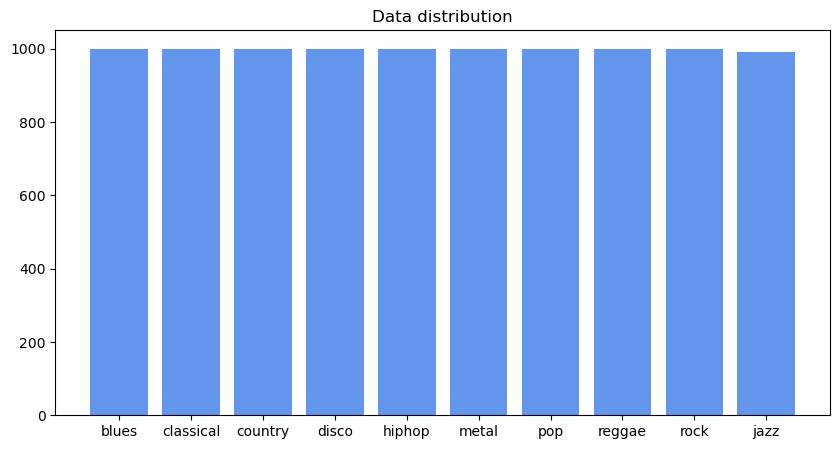

In [ ]:
label = audio_features["label"].value_counts().index
values =  audio_features["label"].value_counts().values
list(label)
list(values)
plt.figure(figsize = (10 , 5))
plt.bar(label , values , color = "cornflowerblue")
plt.title("Data distribution")
plt.savefig("datadistribution.png")
plt.show()

In [6]:
audio_features.describe()

,tempo,mean_y_harmonic,var_y_harmonic,mean_y_perceptr,var_y_perceptr,mean_rms,var_rms,mean_zcr,var_zcr,mean_spectral_cent,...,mfcc_var11,mfcc_var12,mfcc_var13,mfcc_var14,mfcc_var15,mfcc_var16,mfcc_var17,mfcc_var18,mfcc_var19,mfcc_var20
count,9990.000000,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9990.000000,9990.000000,...,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,126.991374,-0.000365,1.260305e-02,-0.000396,5.613012e-03,0.130072,2.671954e-03,0.102639,0.002622,2202.369980,...,63.837602,57.755243,57.117753,53.952143,52.570384,49.862150,51.817818,52.329102,54.794080,57.124850
std,34.482689,0.001700,1.264844e-02,0.001111,6.664144e-03,0.068164,3.560292e-03,0.045643,0.003614,750.391602,...,40.049542,37.370856,35.617435,37.675748,37.120576,34.349217,36.292800,38.055529,41.493448,46.327530
min,0.000000,-0.026748,9.312168e-23,-0.008820,3.626646e-08,0.000947,4.055916e-08,0.013525,0.000005,479.905804,...,4.854331,1.818305,7.659997,3.227941,1.506813,1.343237,1.531855,3.445751,3.147765,0.253587
25%,103.359375,-0.000119,4.094346e-03,-0.000563,1.105656e-03,0.083282,6.289852e-04,0.067385,0.000629,1634.440203,...,37.729820,34.529666,34.805255,32.414888,31.204780,29.516236,29.816504,29.398639,30.382706,29.922272
50%,123.046875,-0.000013,8.431029e-03,-0.000051,3.358353e-03,0.120503,1.500568e-03,0.097972,0.001395,2213.635012,...,53.913063,49.342182,48.718367,45.690906,43.765436,41.481305,42.215925,41.682189,43.243166,44.156439
75%,143.554688,0.000015,1.730535e-02,0.000019,7.531121e-03,0.175398,3.113753e-03,0.132817,0.003060,2714.394795,...,79.326277,69.850868,69.307138,64.833345,62.321825,59.059198,61.422587,61.840459,65.132598,67.996489
max,287.109375,0.015719,1.270379e-01,0.006843,5.950316e-02,0.440458,3.237973e-02,0.347705,0.065185,5432.278846,...,697.528900,575.382000,571.706240,902.318000,622.488950,682.968140,523.140560,628.774400,1147.502400,914.816200


## Data correlation :

*We can observe that some features correlate, but considering the importance of these correlated features and their informative value, there’s no immediate necessity to employ Principal Component Analysis (PCA) or reduce the dimensionality of the features dataset, the CPA will only lead to information loss.*

In [7]:
X = audio_features.drop(["filename", "label"], axis=1)
for i in range(1,21):
    X =  X.drop([f"mfcc_mean{i}", f"mfcc_var{i}"], axis=1)
corr_matrix = X.corr()
corr_matrix

,tempo,mean_y_harmonic,var_y_harmonic,mean_y_perceptr,var_y_perceptr,mean_rms,var_rms,mean_zcr,var_zcr,mean_spectral_cent,var_spectral_cent,mean_spectral_rolloff,var_spectral_rolloff,mean_spectral_bandwidth,var_spectral_bandwidth,mean_chroma_stft,var_chroma_stft
tempo,1.000000,-0.000703,0.010896,-0.004724,-0.005048,0.007492,-0.003710,-0.017487,-0.016693,-0.010932,0.002009,-0.011220,0.010291,-0.009192,0.012909,-0.012315,0.008270
mean_y_harmonic,-0.000703,1.000000,0.070286,0.549049,0.081707,0.065135,0.071910,0.021147,0.045714,0.050594,0.047648,0.051552,0.035708,0.064708,0.013625,0.033909,-0.010369
var_y_harmonic,0.010896,0.070286,1.000000,0.027919,0.564695,0.884798,0.525204,0.078677,0.132767,0.275167,0.192770,0.317351,0.153327,0.349830,0.091541,0.218086,0.024583
mean_y_perceptr,-0.004724,0.549049,0.027919,1.000000,0.064308,-0.013212,0.100374,-0.029953,0.082435,-0.006599,0.089161,-0.012961,0.060246,0.016924,0.035607,-0.110308,0.073167
var_y_perceptr,-0.005048,0.081707,0.564695,0.064308,1.000000,0.766499,0.746445,0.395809,0.402374,0.531307,0.388399,0.531772,0.218079,0.507260,0.129243,0.416818,0.000629
mean_rms,0.007492,0.065135,0.884798,-0.013212,0.766499,1.000000,0.558583,0.294304,0.217736,0.471352,0.241599,0.500871,0.157099,0.495431,0.080222,0.425694,-0.077490
var_rms,-0.003710,0.071910,0.525204,0.100374,0.746445,0.558583,1.000000,0.144692,0.452883,0.329455,0.508628,0.352678,0.377201,0.385633,0.283589,0.245092,0.250160
mean_zcr,-0.017487,0.021147,0.078677,-0.029953,0.395809,0.294304,0.144692,1.000000,0.495937,0.865368,0.242742,0.754889,-0.096681,0.575773,-0.195279,0.455331,-0.390663
var_zcr,-0.016693,0.045714,0.132767,0.082435,0.402374,0.217736,0.452883,0.495937,1.000000,0.579978,0.818936,0.542952,0.388657,0.508024,0.216557,0.277985,0.138507
mean_spectral_cent,-0.010932,0.050594,0.275167,-0.006599,0.531307,0.471352,0.329455,0.865368,0.579978,1.000000,0.477024,0.974211,0.172074,0.889816,0.011308,0.533588,-0.206678


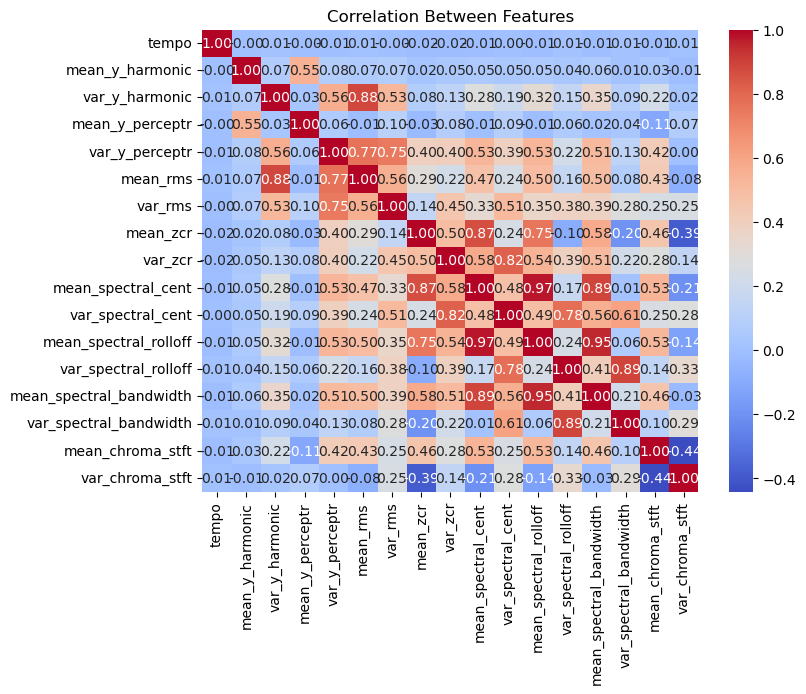

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Features')
plt.savefig('correltion.png')
plt.show()


## Plotting the features per genre

In [9]:
def calculate_mean_values(data, feature, labels):
    mean_values = data.groupby(labels)[feature].mean()
    return np.array(mean_values)

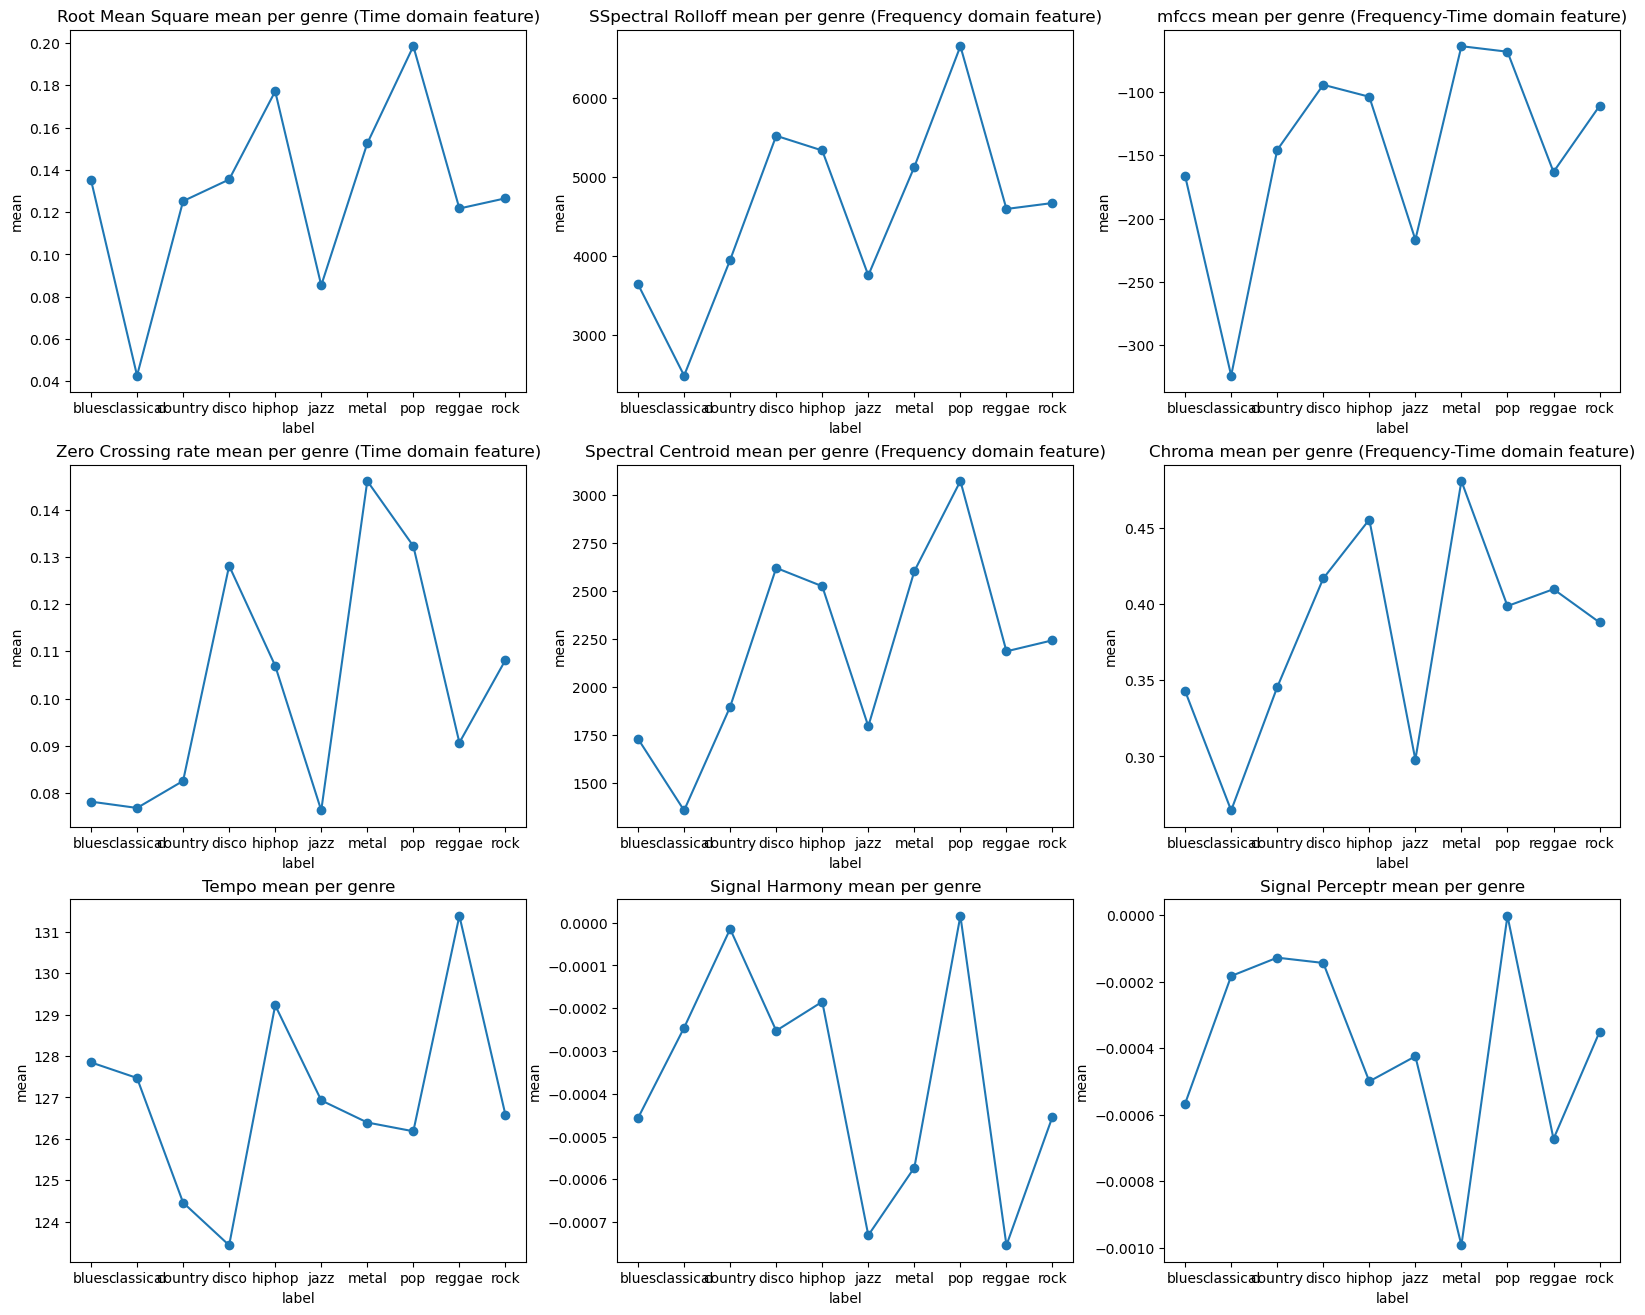

In [ ]:

plt.figure(figsize=(20, 16))

plt.subplot(331)
plt.plot(np.unique(audio_features['label']), calculate_mean_values(audio_features, 'mean_rms', 'label'), marker='o') 
plt.xlabel('label')
plt.ylabel('mean')
plt.title("Root Mean Square mean per genre (Time domain feature)")

plt.subplot(332)
plt.plot(np.unique(audio_features['label']), calculate_mean_values(audio_features, 'mean_spectral_rolloff', 'label'), marker='o')
plt.xlabel('label')
plt.ylabel('mean')
plt.title("SSpectral Rolloff mean per genre (Frequency domain feature)")

plt.subplot(333)
plt.plot(np.unique(audio_features['label']), calculate_mean_values(audio_features, 'mfcc_mean1', 'label'), marker='o') 
plt.xlabel('label')
plt.ylabel('mean')
plt.title('mfccs mean per genre (Frequency-Time domain feature)')

plt.subplot(334)
plt.plot(np.unique(audio_features['label']), calculate_mean_values(audio_features, 'mean_zcr', 'label'), marker='o') 
plt.xlabel('label')
plt.ylabel('mean')
plt.title("Zero Crossing rate mean per genre (Time domain feature)")

plt.subplot(335)
plt.plot(np.unique(audio_features['label']), calculate_mean_values(audio_features, 'mean_spectral_cent', 'label'), marker='o')
plt.xlabel('label')
plt.ylabel('mean')
plt.title("Spectral Centroid mean per genre (Frequency domain feature)")

plt.subplot(336)
plt.plot(np.unique(audio_features['label']), calculate_mean_values(audio_features, 'mean_chroma_stft', 'label'), marker='o') 
plt.xlabel('label')
plt.ylabel('mean')
plt.title('Chroma mean per genre (Frequency-Time domain feature)')

plt.subplot(337)
plt.plot(np.unique(audio_features['label']), calculate_mean_values(audio_features, 'tempo', 'label'), marker='o') 
plt.xlabel('label')
plt.ylabel('mean')
plt.title("Tempo mean per genre")

plt.subplot(338)
plt.plot(np.unique(audio_features['label']), calculate_mean_values(audio_features, 'mean_y_harmonic', 'label'), marker='o')
plt.xlabel('label')
plt.ylabel('mean')
plt.title("Signal Harmony mean per genre")

plt.subplot(339)
plt.plot(np.unique(audio_features['label']), calculate_mean_values(audio_features, 'mean_y_perceptr', 'label'), marker='o') 
plt.xlabel('label')
plt.ylabel('mean')
plt.title('Signal Perceptr mean per genre')
plt.savefig('variance.png')


# Data preparation

In this section we will be :
* *Splitting the labels from the features*
* *Encoding the labels*
* *Standarizing the features*
* *Splitting the data into trainset and testset*


In [11]:
features_df = audio_features.drop(["filename","label"], axis=1)
label_df = audio_features["label"]

In [12]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(label_df)

In [13]:
cols = features_df.columns 
scaler = preprocessing.StandardScaler() 
np_scaled = scaler.fit_transform(features_df) 
X = pd.DataFrame(np_scaled, columns = cols)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
      X 
      , y_encoded 
      , test_size=0.33
      , random_state=42
      , stratify= y_encoded
      )

# Machine Leaning Approach

# 1. Models fitting without parameters 

We choose to work with :
* *`Logistic Regression`*
* *`Random Forest`*
* *`XGBoost`*

In [15]:

# -------------------------------------------------------------------------------------------------------

# -------------------------------------- Logistic Regression --------------------------------------------

classifier_reg = LogisticRegression()
title_reg = "Logistic Reression"

# -------------------------------------------- Random Forest --------------------------------------------

classifier_rf = RandomForestClassifier()
title_rf = "Random Forest"

# ------------------------------------------------ XGBoost ----------------------------------------------

classifier_xgb = XGBClassifier() 
title_xgb = "XGBoost"

# -------------------------------------------------------------------------------------------------------

classifiers = [classifier_reg , classifier_rf, classifier_xgb]

titles = [title_reg, title_rf,title_xgb]


In [16]:
acc_tests = []
for clf , title in zip(classifiers,titles):  
    
    clf.fit(X_train, y_train)
    acc_test = accuracy_score(clf.predict(X_test), y_test)
    print(title + " Accuracy Score Before Parameters tuning", acc_test)
    acc_tests.append(acc_test)
    

Logistic Reression Accuracy Score Before Parameters tuning 0.716105550500455
Random Forest Accuracy Score Before Parameters tuning 0.8522899605702153
XGBoost Accuracy Score Before Parameters tuning 0.8856536245071277


In [17]:
acc_dict = dict([("Test Accuracy", acc_tests)])

acc_df = pd.DataFrame(acc_dict, index = ["Logistic Regression", "Random Forest","XGBoost"])
acc_df

,Test Accuracy
Logistic Regression,0.716106
Random Forest,0.852290
XGBoost,0.885654


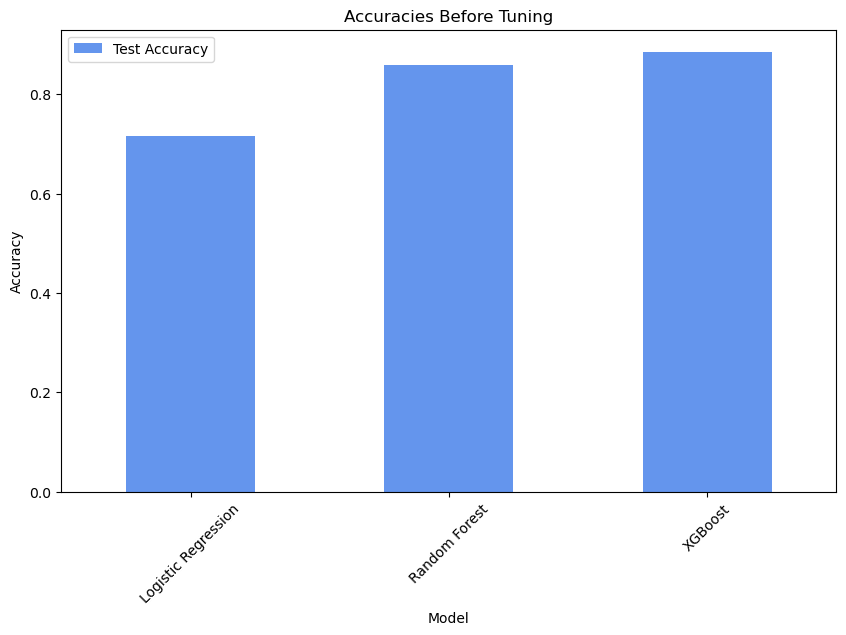

In [21]:
acc_df.plot(kind='bar', figsize=(10, 6), color=('cornflowerblue','lightsteelblue'))
plt.title('Accuracies Before Tuning')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

# 2. Hyperparameters tuning

In this section we used `Grid Search` to different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters for each model

## 2.1. Logistic Regression

In [22]:
param_grid = {
    'penalty': ['l1', 'l2'],  
    'C': [0.01, 0.1, 1], 
    'max_iter':[500,1000,1500]
}

log_reg = LogisticRegression()  

grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy} ")
print(f"Best Parameters: {best_params}")

/Users/houdamoudni/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/houdamoudni/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/houdamoudni/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/houdamoudni/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future ver

Test Accuracy: 0.7170154686078253 
Best Parameters: {'C': 1, 'max_iter': 500, 'penalty': 'l2'}


## 2.2. Random Forest

In [23]:

param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [10, 20, 30], 
}

classifier_rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=classifier_rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy} ")
print(f"Best Parameters: {best_params}")

/Users/houdamoudni/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/houdamoudni/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/houdamoudni/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/houdamoudni/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future ver

Test Accuracy: 0.8635122838944495 
Best Parameters: {'max_depth': None, 'n_estimators': 300}


## 2.3. XGBoost

In [42]:

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

xgb_model = XGBClassifier(random_state=42)

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")
print(f"Best Parameters: {best_params}")

Test Accuracy: 0.8920230512587201
Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}


# 3. Models after hyperparameters tuning

In [18]:

# -------------------------------------------------------------------------------------------------------

# -------------------------------------- Logistic Regression -------------------------------------------

classifier_reg = LogisticRegression(C = 1, 
                             max_iter = 500, 
                             penalty = 'l2')

title_reg = "Logistic Reression"

# -------------------------------------- Random Forest -------------------------------------------

classifier_rf = RandomForestClassifier(max_depth= 20
                                       , n_estimators= 300)

title_rf = "Random Forest"

# -------------------------------------- XGBoost -------------------------------------------

classifier_xgb = XGBClassifier(random_state=42, 
                          learning_rate = 0.2, 
                          max_depth = 5, 
                          n_estimators = 300
                         )

title_xgb = "XGBoost"

# -------------------------------------------------------------------------------------------------------

classifiers = [classifier_reg , classifier_rf, classifier_xgb]

titles = [title_reg, title_rf, title_xgb]

In [19]:
acc_tests_tuning = []
for clf , title in zip(classifiers,titles):  
    
    clf.fit(X_train, y_train)
    acc_train = accuracy_score(clf.predict(X_train), y_train)
    acc_test = accuracy_score(clf.predict(X_test), y_test)
    print(title + " Accuracy Score After Parameters tuning", acc_test)
    acc_tests_tuning.append(acc_test)  
    

Logistic Reression Accuracy Score After Parameters tuning 0.7170154686078253
Random Forest Accuracy Score After Parameters tuning 0.8604792235365484
XGBoost Accuracy Score After Parameters tuning 0.8920230512587201


In [20]:
acc_dict = dict([
    ("Test Accuracy", acc_tests_tuning)
])

acc = pd.DataFrame(acc_dict, index = ["Logistic Regression", "Random Forest","XGBoost"])
acc

,Test Accuracy
Logistic Regression,0.717015
Random Forest,0.860479
XGBoost,0.892023


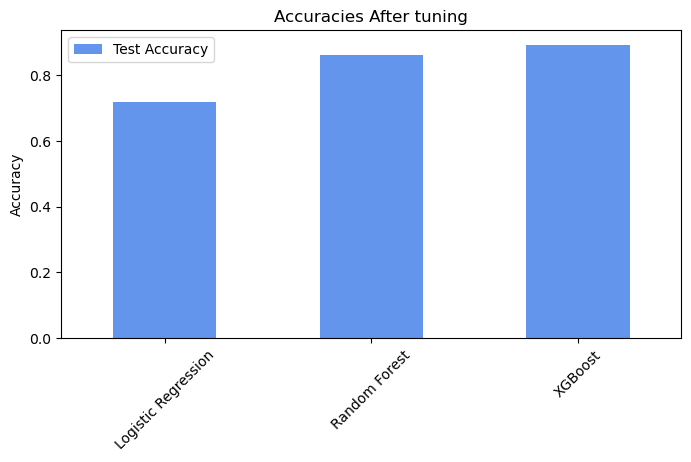

In [21]:
acc.plot(kind='bar', figsize=(8, 4), color=('cornflowerblue','lightsteelblue'))
plt.title('Accuracies After tuning')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

# 4. Models evaluation

In [22]:
acc_dict = dict([
    ("Before tuning", acc_tests),
    ("After tuning", acc_tests_tuning)
])

acc = pd.DataFrame(acc_dict, index = ["Logistic Regression", "Random Forest","XGBoost"])
acc

,Before tuning,After tuning
Logistic Regression,0.716106,0.717015
Random Forest,0.852290,0.860479
XGBoost,0.885654,0.892023


## 4.1. Plotting the accuracies

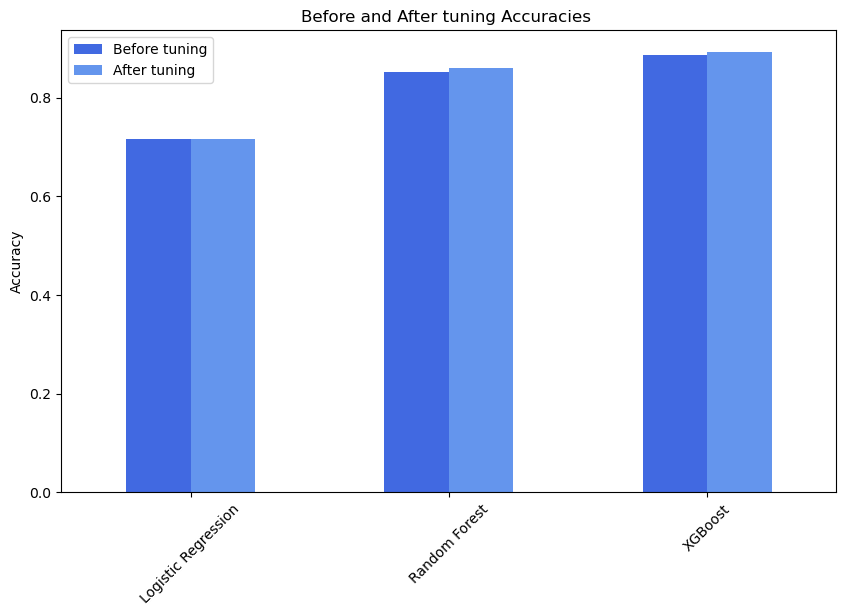

In [23]:
acc.plot(kind='bar', figsize=(10, 6), color=('royalblue','cornflowerblue'))
plt.title('Before and After tuning Accuracies ')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

## 4.2. Final reports

We can clearly observe that the XGBoost has the highest:
- Precision
- Recall
- f1-score
- Support

In [24]:
for clf, title in zip(classifiers, titles):
    print(title + " Classification Report:")
    print(classification_report(y_test, clf.predict(X_test)))

Logistic Reression Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.73      0.71       330
           1       0.90      0.94      0.92       330
           2       0.66      0.61      0.63       330
           3       0.62      0.65      0.64       330
           4       0.72      0.62      0.67       330
           5       0.79      0.83      0.81       327
           6       0.80      0.86      0.83       330
           7       0.78      0.80      0.79       330
           8       0.65      0.62      0.63       330
           9       0.53      0.51      0.52       330

    accuracy                           0.72      3297
   macro avg       0.71      0.72      0.71      3297
weighted avg       0.71      0.72      0.71      3297

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       330
           1       0.91      0.97      0.94       330

## 4.3. Confusion matrix

<Figure size 640x480 with 0 Axes>

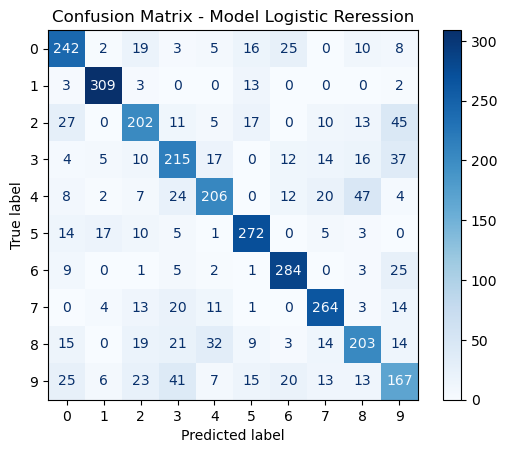

<Figure size 640x480 with 0 Axes>

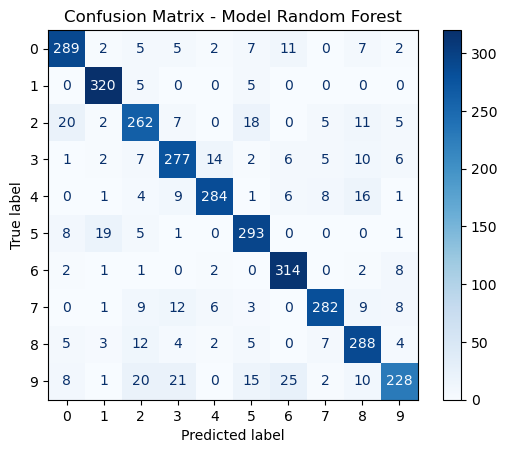

<Figure size 640x480 with 0 Axes>

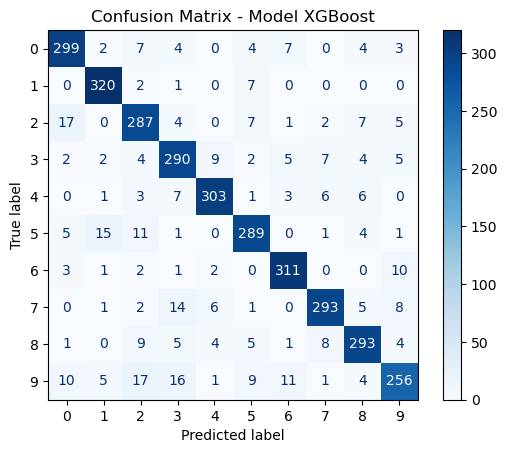

In [25]:
for clf , title in zip(classifiers, titles):
    cm = confusion_matrix(y_test, clf.predict(X_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)

    plt.figure()
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - Model {title}')

    plt.show()

# The choosen model

After comparing all these metrics we can assume that the most performing model is :
- `XGBoost` with an accuracy of 89%

# 5. Test

## Testing the model classifier_xgb with new data ( 30sc audio data )

In [26]:
file = 'dataset/data_30sc.csv'
data = pd.read_csv(file)
data

,filename,tempo,mean_y_harmonic,var_y_harmonic,mean_y_perceptr,var_y_perceptr,mean_rms,var_rms,mean_zcr,var_zcr,...,mfcc_var12,mfcc_var13,mfcc_var14,mfcc_var15,mfcc_var16,mfcc_var17,mfcc_var18,mfcc_var19,mfcc_var20,label
0,blues.00000.wav,123.046875,-4.906630e-05,0.008172,-0.000011,0.005704,0.130184,0.002828,0.083045,0.000767,...,51.280754,41.215897,40.517520,49.784233,52.424534,36.535866,41.603170,55.053654,46.941350,blues
1,blues.00001.wav,67.999589,1.412814e-04,0.005101,-0.000180,0.003064,0.095908,0.002373,0.056040,0.001448,...,96.204530,64.873070,73.150430,52.429462,55.337963,60.231407,48.133213,51.106014,45.788700,blues
2,blues.00002.wav,161.499023,-1.816742e-06,0.016344,-0.000020,0.007464,0.175473,0.002751,0.076291,0.001007,...,64.494760,60.390583,57.690224,36.514374,40.641678,47.629646,52.393597,46.643400,30.653150,blues
3,blues.00003.wav,117.453835,3.612608e-06,0.019055,-0.000018,0.002711,0.141040,0.006348,0.033309,0.000423,...,48.214520,56.776222,62.243004,51.609818,44.432896,50.218452,37.325726,37.257774,31.965254,blues
4,blues.00004.wav,135.999178,-1.845967e-05,0.004814,-0.000010,0.003094,0.091501,0.002305,0.101461,0.001954,...,86.436490,89.548325,70.915690,75.754220,85.995200,75.276740,53.633236,62.882492,55.190254,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,rock.00095.wav,103.359375,-2.244084e-06,0.004598,-0.000016,0.000681,0.079446,0.000346,0.089227,0.001305,...,43.482270,49.127956,56.371140,36.627750,45.036552,41.667393,36.720837,54.836437,49.946903,rock
995,rock.00096.wav,117.453835,4.418575e-06,0.003983,-0.000012,0.000818,0.076423,0.000589,0.097664,0.000868,...,38.232500,34.816060,29.095690,43.540905,33.842630,39.252410,32.027820,39.176170,31.719294,rock
996,rock.00097.wav,129.199219,2.109086e-06,0.003827,-0.000013,0.001128,0.081598,0.000322,0.121823,0.001697,...,42.927063,44.228910,37.244920,39.429790,33.591026,36.294918,35.954890,42.507107,29.860994,rock
997,rock.00098.wav,112.347147,2.893090e-07,0.006075,-0.000015,0.000654,0.083802,0.001207,0.048724,0.000808,...,75.412290,56.674496,42.604523,46.753723,46.314510,43.620600,34.335720,47.172318,41.296356,rock


In [27]:
X = data.drop(["filename","label"], axis=1)
y = data["label"]
metadata = X.to_numpy()
label = y.to_numpy()
y_encoded = label_encoder.transform(label)
np_scaled = scaler.transform(X) 


In [28]:
acc = accuracy_score(classifier_xgb.predict(np_scaled), y_encoded)
print(f"The Accuracy is {acc}")

The Accuracy is 0.965965965965966


## Testing the model classifier_xgb with new data ( Youtube Audios )

### Uplaoding the music file from Youtube

In [29]:
url='https://youtu.be/cIw17g53Jd4?si=jlyXxKo7Xrm4PtVD'
yt = YouTube(url)
video = yt.streams.filter(only_audio=True).first()

out_file = video.download(output_path=".")

base, ext = os.path.splitext(out_file)
new_file = base + '.wav'
os.rename(out_file, new_file)

### Extracting the features from the audio file

In [30]:
def extraction_features(new_file):
    
    header = [
         'tempo', 'mean_y_harmonic', 'var_y_harmonic', 'mean_y_perceptr','var_y_perceptr',
        'mean_rms', 'var_rms', 'mean_zcr', 'var_zcr', 'mean_spectral_cent',
        'var_spectral_cent', 'mean_spectral_rolloff', 'var_spectral_rolloff',
        'mean_spectral_bandwidth', 'var_spectral_bandwidth', 'mean_chroma_stft',
        'var_chroma_stft'
    ]

    for i in range(1, 21):
        header.append(f'mfcc_mean{i}')

    for i in range(1, 21):
        header.append(f'mfcc_var{i}')


    y, sr = librosa.load(new_file)
    y_harmonic, y_perceptr = librosa.effects.hpss(y)
    tempo, _ = librosa.beat.beat_track(y=y_harmonic, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y=y)
    rms = librosa.feature.rms(y=y)
    spectral_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)

    
    features_list = [
            tempo, np.mean(y_harmonic), np.var(y_harmonic), np.mean(y_perceptr),
            np.var(y_perceptr), np.mean(rms), np.var(rms), np.mean(zcr), np.var(zcr),
            np.mean(spectral_cent), np.var(spectral_cent), np.mean(spectral_rolloff),
            np.var(spectral_rolloff), np.mean(spectral_bandwidth),
            np.var(spectral_bandwidth), np.mean(chroma_stft), np.var(chroma_stft)
        ]
    
    for e_mean in mfcc:
        features_list.append(np.mean(e_mean))

    for e_var in mfcc:
        features_list.append(np.var(e_var))

    
    features_dict = dict(zip(header, features_list))
    df = pd.DataFrame([features_dict])
    return df

### Preparing the data 

In [31]:
data = extraction_features(new_file)

cols = data.columns 
np_scaled = scaler.transform(data) 
 
X = pd.DataFrame(np_scaled, columns = cols)
X

,tempo,mean_y_harmonic,var_y_harmonic,mean_y_perceptr,var_y_perceptr,mean_rms,var_rms,mean_zcr,var_zcr,mean_spectral_cent,...,mfcc_var11,mfcc_var12,mfcc_var13,mfcc_var14,mfcc_var15,mfcc_var16,mfcc_var17,mfcc_var18,mfcc_var19,mfcc_var20
0,1.669876,0.214752,3.060221,0.233008,1.761912,2.006983,4.853942,-0.464285,0.784538,0.023417,...,0.350656,0.408805,-0.070411,0.289938,0.232276,0.315476,0.315521,-0.201063,-0.437458,-0.098257


In [32]:
y_pred = classifier_xgb.predict(np_scaled)
print(f"this music's genre would be defined as {label_encoder.inverse_transform(y_pred)}")

this music's genre would be defined as ['hiphop']


# 6. Model Deployment

In [33]:
pickle.dump(scaler , open('Deployed_models/scaler-model.pk1' , 'wb'))

In [34]:
pickle.dump(label_encoder , open('Deployed_models/label-encoder-model.pk1' , 'wb'))

In [77]:
pickle.dump(classifier_xgb , open('Deployed_models/classifier-model.pk1' , 'wb'))


- personnel email  : mdnhouda1702@gmail.com
- academic email : houda.moudni@etu.uae.ac.ma
